In [1]:
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px #data visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read data common vunerabilities exposures

In [3]:
cves = pd.read_csv('/content/drive/MyDrive/Project3/cve.csv')
cves.head()

,cve_id,mod_date,pub_date,cvss,cwe_id,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,CVE-2019-16548,11/21/2019 15:15,11/21/2019 15:15,6.8,352,Cross-Site Request Forgery (CSRF),A cross-site request forgery vulnerability in ...,NaN,NaN,NaN,NaN,NaN,NaN
1,CVE-2019-16547,11/21/2019 15:15,11/21/2019 15:15,4.0,732,Incorrect Permission Assignment for Critical ...,Missing permission checks in various API endpo...,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2019-16546,11/21/2019 15:15,11/21/2019 15:15,4.3,639,Authorization Bypass Through User-Controlled Key,Jenkins Google Compute Engine Plugin 4.1.1 and...,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2013-2092,11/20/2019 21:22,11/20/2019 21:15,4.3,79,Improper Neutralization of Input During Web P...,Cross-site Scripting (XSS) in Dolibarr ERP/CRM...,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2013-2091,11/20/2019 20:15,11/20/2019 20:15,7.5,89,Improper Neutralization of Special Elements u...,SQL injection vulnerability in Dolibarr ERP/CR...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cves.isna().sum()

cve_id                      0
mod_date                    0
pub_date                    0
cvss                        0
cwe_id                      0
cwe_name                    0
summary                     0
access_authentication     884
access_complexity         884
access_vector             884
impact_availability       884
impact_confidentiality    884
impact_integrity          884
dtype: int64

In [5]:
cves.dropna(how='any', inplace=True)
risk_probability = [cvss / 10 for cvss in cves['cvss']]
cves['risk_probability'] = risk_probability
cves['risk_probability'] = cves['risk_probability'].round(2)
cves.head(10)

,cve_id,mod_date,pub_date,cvss,cwe_id,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,risk_probability
138,CVE-2019-2211,11/14/2019 21:36,11/13/2019 18:15,7.8,89,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE,0.78
139,CVE-2019-2212,11/14/2019 21:30,11/13/2019 18:15,4.9,200,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE,0.49
140,CVE-2019-2213,11/14/2019 21:24,11/13/2019 18:15,6.9,416,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE,0.69
149,CVE-2019-2214,11/14/2019 21:19,11/13/2019 18:15,7.2,269,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,0.72
150,CVE-2019-18793,11/14/2019 21:14,11/13/2019 20:15,4.3,79,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,0.43
151,CVE-2019-18646,11/14/2019 20:57,11/14/2019 15:15,6.5,89,Improper Neutralization of Special Elements u...,The Untangle NG firewall 14.2.0 is vulnerable ...,SINGLE,LOW,NETWORK,PARTIAL,PARTIAL,PARTIAL,0.65
166,CVE-2019-16950,11/14/2019 20:45,11/13/2019 19:15,4.3,79,Improper Neutralization of Input During Web P...,An XSS issue was discovered in Enghouse Web Ch...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,0.43
167,CVE-2019-18647,11/14/2019 20:37,11/14/2019 15:15,9.0,74,Neutralization of Special Elements in Output ...,The Untangle NG firewall 14.2.0 is vulnerable ...,SINGLE,LOW,NETWORK,COMPLETE,COMPLETE,COMPLETE,0.90
168,CVE-2019-18649,11/14/2019 20:23,11/14/2019 15:15,3.5,79,Improper Neutralization of Input During Web P...,"When logged in as an admin user, the Title inp...",SINGLE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,0.35
169,CVE-2019-18648,11/14/2019 20:19,11/14/2019 15:15,3.5,79,Improper Neutralization of Input During Web P...,"When logged in as an admin user, the Untangle ...",SINGLE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,0.35


In [6]:
cwes = pd.read_csv('/content/drive/MyDrive/Project3/cwes.csv')
cwes

,_id,cwe_id,cwe_name,description
0,63e76e42e7ec9a5bef1df179,CWE-843,Access of Resource Using Incompatible Type ('T...,The program allocates or initializes a resourc...
1,63e76e42e7ec9a5bef1df17a,CWE-824,Access of Uninitialized Pointer,The program accesses or uses a pointer that ha...
2,63e76e42e7ec9a5bef1df17b,CWE-770,Allocation of Resources Without Limits or Thro...,The software allocates a reusable resource or ...
3,63e76e42e7ec9a5bef1df17c,CWE-670,Always-Incorrect Control Flow Implementation,The code contains a control flow path that doe...
4,63e76e42e7ec9a5bef1df17d,CWE-294,Authentication Bypass by Capture-replay,A capture-replay flaw exists when the design o...
...,...,...,...,...
124,63e76e42e7ec9a5bef1df1f5,CWE-916,Use of Password Hash With Insufficient Computa...,"The software generates a hash for a password, ..."
125,63e76e42e7ec9a5bef1df1f6,CWE-908,Use of Uninitialized Resource,The software uses or accesses a resource that ...
126,63e76e42e7ec9a5bef1df1f7,CWE-640,Weak Password Recovery Mechanism for Forgotten...,The software contains a mechanism for users to...
127,63e76e42e7ec9a5bef1df1f8,CWE-521,Weak Password Requirements,The product does not require that users should...


In [7]:
products = pd.read_csv('/content/drive/MyDrive/Project3/products.csv')
products.head()

,cve_id,vulnerable_product
0,CVE-2019-16548,google_compute_engine
1,CVE-2019-16547,google_compute_engine
2,CVE-2019-16546,google_compute_engine
3,CVE-2013-2092,dolibarr
4,CVE-2013-2091,dolibarr


In [8]:
products.dropna(how='any', inplace=True)
products.head()

,cve_id,vulnerable_product
0,CVE-2019-16548,google_compute_engine
1,CVE-2019-16547,google_compute_engine
2,CVE-2019-16546,google_compute_engine
3,CVE-2013-2092,dolibarr
4,CVE-2013-2091,dolibarr


In [9]:
# Get all CVEs for each product
cves_of_product = products.groupby('vulnerable_product')['cve_id'].agg(list).reset_index()
cves_of_product = cves_of_product.rename(columns={'cve_id': 'cve_list'})
# Print the CVEs
cves_of_product

,vulnerable_product,cve_list
0,-,"[CVE-2017-13097, CVE-2017-13096, CVE-2017-1309..."
1,-5120-24g-poe\+_\(370w\)_si_switch,[CVE-2012-3268]
2,-ma5200g,[CVE-2012-3268]
3,.net_agent,[CVE-2017-9246]
4,.net_communication_protocol_components,"[CVE-2013-2794, CVE-2013-2793]"
...,...,...
40548,zzcms,"[CVE-2018-17798, CVE-2019-1010149, CVE-2019-10..."
40549,zziplib,"[CVE-2018-7727, CVE-2018-6869, CVE-2018-16548,..."
40550,zzmcms,[CVE-2019-1010151]
40551,zzzphp,"[CVE-2019-17408, CVE-2019-16720, CVE-2019-1672..."


In [10]:
merge_products = products.merge(cves, on='cve_id')
merge_products

,cve_id,vulnerable_product,mod_date,pub_date,cvss,cwe_id,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,risk_probability
0,CVE-2019-2211,android,11/14/2019 21:36,11/13/2019 18:15,7.8,89,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE,0.78
1,CVE-2019-2212,android,11/14/2019 21:30,11/13/2019 18:15,4.9,200,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE,0.49
2,CVE-2019-2213,android,11/14/2019 21:24,11/13/2019 18:15,6.9,416,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE,0.69
3,CVE-2019-2214,android,11/14/2019 21:19,11/13/2019 18:15,7.2,269,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,0.72
4,CVE-2019-18793,parallels_plesk_panel,11/14/2019 21:14,11/13/2019 20:15,4.3,79,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173241,CVE-2002-1432,midicart_asp,9/5/2008 4:00,4/11/2003 4:00,5.0,200,Information Exposure,MidiCart stores the midicart.mdb database file...,NONE,LOW,NETWORK,NONE,PARTIAL,NONE,0.50
173242,CVE-2002-1432,midicart_asp_maxi,9/5/2008 4:00,4/11/2003 4:00,5.0,200,Information Exposure,MidiCart stores the midicart.mdb database file...,NONE,LOW,NETWORK,NONE,PARTIAL,NONE,0.50
173243,CVE-2002-1432,midicart_asp_plus,9/5/2008 4:00,4/11/2003 4:00,5.0,200,Information Exposure,MidiCart stores the midicart.mdb database file...,NONE,LOW,NETWORK,NONE,PARTIAL,NONE,0.50
173244,CVE-2002-1432,salescart-pro,9/5/2008 4:00,4/11/2003 4:00,5.0,200,Information Exposure,MidiCart stores the midicart.mdb database file...,NONE,LOW,NETWORK,NONE,PARTIAL,NONE,0.50


In [23]:
group_data = merge_products.groupby('vulnerable_product').agg({
    'cve_id': list,
    'risk_probability': list
}).reset_index()
group_data

,vulnerable_product,cve_id,risk_probability
0,-,"[CVE-2017-13097, CVE-2017-13096, CVE-2017-1309...","[0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.21]"
1,-5120-24g-poe\+_\(370w\)_si_switch,[CVE-2012-3268],[0.85]
2,-ma5200g,[CVE-2012-3268],[0.85]
3,.net_agent,[CVE-2017-9246],[0.75]
4,.net_communication_protocol_components,"[CVE-2013-2794, CVE-2013-2793]","[0.49, 0.78]"
...,...,...,...
38741,zzcms,"[CVE-2018-17798, CVE-2019-1010149, CVE-2019-10...","[0.55, 0.75, 0.75, 0.75, 0.75, 0.75, 0.43, 0.6..."
38742,zziplib,"[CVE-2018-7727, CVE-2018-6869, CVE-2018-16548,...","[0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.5..."
38743,zzmcms,[CVE-2019-1010151],[0.75]
38744,zzzphp,"[CVE-2019-17408, CVE-2019-16720, CVE-2019-1672...","[0.75, 0.5, 0.75, 0.75, 1.0, 0.65, 0.68]"


In [24]:
group_data['attacker'] = np.random.choice(['APT Group', 'Skill hacker'], size=len(group_data))
group_data

,vulnerable_product,cve_id,risk_probability,attacker
0,-,"[CVE-2017-13097, CVE-2017-13096, CVE-2017-1309...","[0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.21]",APT Group
1,-5120-24g-poe\+_\(370w\)_si_switch,[CVE-2012-3268],[0.85],APT Group
2,-ma5200g,[CVE-2012-3268],[0.85],Skill hacker
3,.net_agent,[CVE-2017-9246],[0.75],APT Group
4,.net_communication_protocol_components,"[CVE-2013-2794, CVE-2013-2793]","[0.49, 0.78]",APT Group
...,...,...,...,...
38741,zzcms,"[CVE-2018-17798, CVE-2019-1010149, CVE-2019-10...","[0.55, 0.75, 0.75, 0.75, 0.75, 0.75, 0.43, 0.6...",APT Group
38742,zziplib,"[CVE-2018-7727, CVE-2018-6869, CVE-2018-16548,...","[0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.5...",Skill hacker
38743,zzmcms,[CVE-2019-1010151],[0.75],Skill hacker
38744,zzzphp,"[CVE-2019-17408, CVE-2019-16720, CVE-2019-1672...","[0.75, 0.5, 0.75, 0.75, 1.0, 0.65, 0.68]",APT Group


In [25]:
group_data['attacker_capability'] = np.where(group_data['attacker'] == 'APT Group', 0.9, 0.8)
group_data['defender'] = 'Clustering communication'
group_data['defender_effectiveness'] = 0.05
group_data

,vulnerable_product,cve_id,risk_probability,attacker,attacker_capability,defender,defender_effectiveness
0,-,"[CVE-2017-13097, CVE-2017-13096, CVE-2017-1309...","[0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.21]",APT Group,0.9,Clustering communication,0.05
1,-5120-24g-poe\+_\(370w\)_si_switch,[CVE-2012-3268],[0.85],APT Group,0.9,Clustering communication,0.05
2,-ma5200g,[CVE-2012-3268],[0.85],Skill hacker,0.8,Clustering communication,0.05
3,.net_agent,[CVE-2017-9246],[0.75],APT Group,0.9,Clustering communication,0.05
4,.net_communication_protocol_components,"[CVE-2013-2794, CVE-2013-2793]","[0.49, 0.78]",APT Group,0.9,Clustering communication,0.05
...,...,...,...,...,...,...,...
38741,zzcms,"[CVE-2018-17798, CVE-2019-1010149, CVE-2019-10...","[0.55, 0.75, 0.75, 0.75, 0.75, 0.75, 0.43, 0.6...",APT Group,0.9,Clustering communication,0.05
38742,zziplib,"[CVE-2018-7727, CVE-2018-6869, CVE-2018-16548,...","[0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.5...",Skill hacker,0.8,Clustering communication,0.05
38743,zzmcms,[CVE-2019-1010151],[0.75],Skill hacker,0.8,Clustering communication,0.05
38744,zzzphp,"[CVE-2019-17408, CVE-2019-16720, CVE-2019-1672...","[0.75, 0.5, 0.75, 0.75, 1.0, 0.65, 0.68]",APT Group,0.9,Clustering communication,0.05


In [14]:
random_products = group_data.sample(n=2)
random_products

,vulnerable_product,cve_id,risk_probability,attacker,attacker_capability,defender,defender_effectiveness
555,3par_service_processor_firmware,"[CVE-2019-5399, CVE-2019-5400, CVE-2019-5395, ...","[0.97, 0.65, 0.65, 0.97, 0.97, 0.35, 0.97]",Skill hacker,0.8,Clustering communication,0.05
5730,citectfacilities,"[CVE-2008-2639, CVE-2013-3075]","[0.76, 1.0]",Skill hacker,0.8,Clustering communication,0.05


Create a graph from the dataset using NetworkX, example view graph

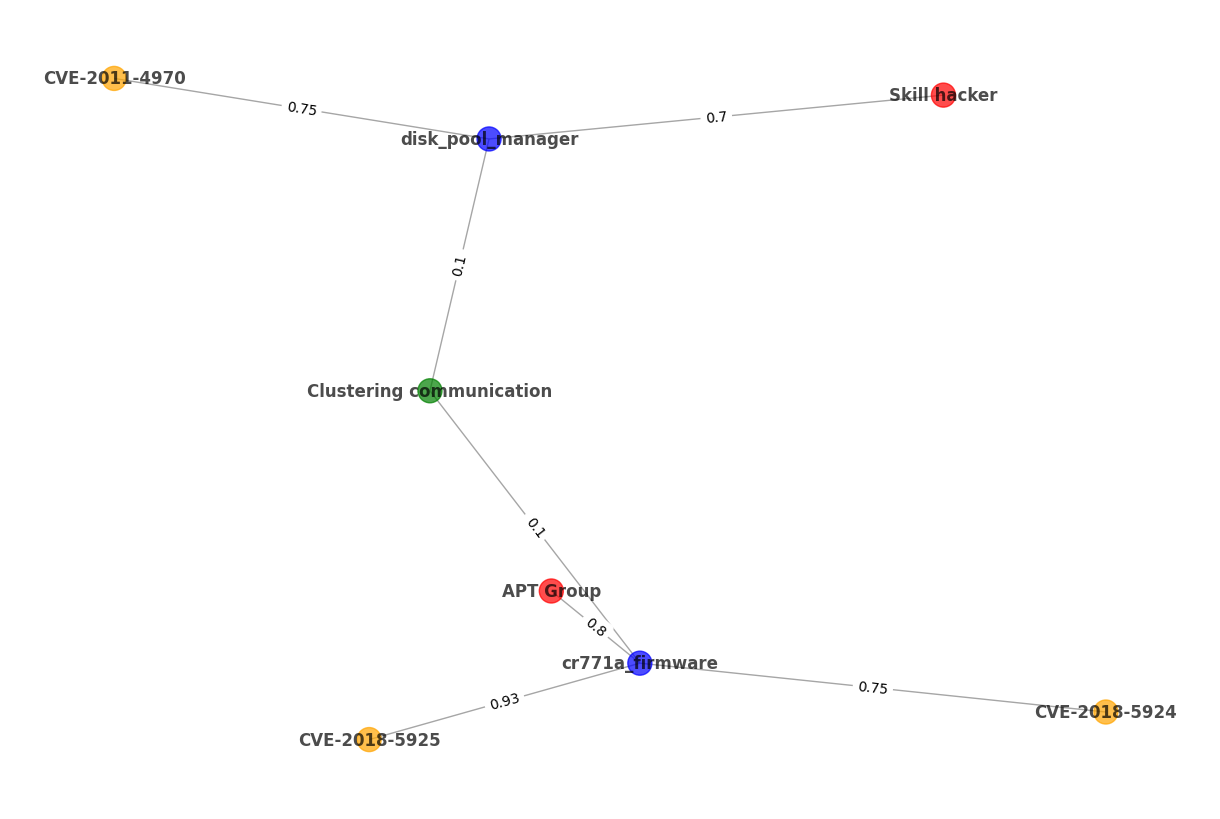

In [ ]:
sample_graph = nx.Graph()
for _, row in random_products.iterrows():
    product = row['vulnerable_product']
    attacker = row['attacker']
    attacker_capability = row['attacker_capability']
    defender = row['defender']
    defender_effectiveness = row['defender_effectiveness']
    cve_list = row['cve_id']
    risk_list = row['risk_probability']
    sample_graph.add_node(product, node_type='Product')
    sample_graph.add_node(attacker, node_type='Attacker')
    sample_graph.add_edge(attacker, product, weight=attacker_capability)
    sample_graph.add_node(defender, node_type="Defender")
    sample_graph.add_edge(defender, product, weight=defender_effectiveness)
    # Add nodes and edges for each CVE in the cve_list
    for cve, risk_prob in zip(cve_list, risk_list):
        sample_graph.add_node(cve, node_type='CVE')
        sample_graph.add_edge(product, cve, weight=risk_prob)

# Visualize the graph
# pos = nx.spring_layout(attack_graph)
# nx.draw(attack_graph, pos, with_labels=True, font_weight='bold')
# plt.show()
# Define a color map for node types
node_color_map = {'Product': 'blue', 'CVE': 'orange', 'Attacker': 'red', 'Defender': 'green'}

# Visualize the graph with customized parameters
pos = nx.spring_layout(sample_graph, seed=42)
node_color = [node_color_map[node_type] for node_type in nx.get_node_attributes(sample_graph, 'node_type').values()]
edge_color = 'gray'

plt.figure(figsize=(12, 8))
nx.draw(sample_graph, pos, with_labels=True, font_weight='bold', node_size=300, node_color=node_color, edge_color=edge_color, alpha=0.7)
edge_labels = nx.get_edge_attributes(sample_graph, 'weight')
nx.draw_networkx_edge_labels(sample_graph, pos, edge_labels=edge_labels)
plt.show()

In [26]:
attack_graphs = []

for _, row in group_data.iterrows():
    product = row['vulnerable_product']
    attacker = row['attacker']
    attacker_capability = row['attacker_capability']
    defender = row['defender']
    defender_effectiveness = row['defender_effectiveness']
    cve_list = row['cve_id']
    risk_list = row['risk_probability']
    attack_graph = nx.Graph()
    attack_graph.add_node(product, node_type='Product')
    attack_graph.add_node(attacker, node_type='Attacker')
    attack_graph.add_edge(product, attacker, weight=attacker_capability)
    attack_graph.add_node(defender, node_type="Defender")
    attack_graph.add_edge(product, defender, weight=defender_effectiveness)
    # Add nodes and edges for each CVE in the cve_list
    for cve, risk_prob in zip(cve_list, risk_list):
        attack_graph.add_node(cve, node_type='CVE')
        attack_graph.add_edge(product, cve, weight=risk_prob)
    attack_graphs.append(attack_graph)
print(len(attack_graphs))

38746


In [ ]:
# risk_probability_value = cves[cves['cve_id'] == 'CVE-2016-0363']['risk_probability'].values[0]
# print(risk_probability_value)

0.6799999999999999


Calculate risk probability of attack for each product

In [27]:
product_risk_level = {}

for attack_graph in attack_graphs:
  product_nodes = [node for node, data in attack_graph.nodes(data=True) if data.get('node_type') == 'Product']
  # print(product_nodes)
  attacker_node = [node for node, data in attack_graph.nodes(data=True) if data.get('node_type') == 'Attacker'][0]
  # print(attacker_node)
  defender_node = [node for node, data in attack_graph.nodes(data=True) if data.get('node_type') == 'Defender'][0]

  for product_node in product_nodes:
    neighbors = attack_graph.neighbors(product_node)
    cve_nodes = [neighbor for neighbor in neighbors if attack_graph.nodes[neighbor]['node_type'] == 'CVE']
    # print(cve_nodes)

    risk_prob = [attack_graph[product_node][cve_node]['weight'] for cve_node in cve_nodes]
    # print(risk_prob)
    attacker_capability = attack_graph[product_node][attacker_node]['weight']
    defender_effectiveness = attack_graph[product_node][defender_node]['weight']

    product_not_risk_probability = 1.0
    for prob in risk_prob:
      product_not_risk_probability *= (1 - prob)
    product_risk_probability = (1 - product_not_risk_probability) * attacker_capability - defender_effectiveness

    product_risk_level[product_node] = product_risk_probability
print(product_risk_level)

{'-': 0.8404802417570137, '-5120-24g-poe\\+_\\(370w\\)_si_switch': 0.715, '-ma5200g': 0.63, '.net_agent': 0.625, '.net_communication_protocol_components': 0.74902, '.net_core': 0.8484169140625, '.net_core_sdk': 0.31000000000000005, '.net_forum': 0.22999999999999998, '.net_framework': 0.85, '.net_framework_developer_pack': 0.11799999999999998, '.net_reflector': 0.562, '.netstore': 0.33699999999999997, '.network_weathermap': 0.5934999999999999, '.x10_automatic_mp3_script': 0.625, '0.1.0': 0.562, '0.1.1': 0.625, '0.11': 0.652, '0.2': 0.55, '0.80_rc4': 0.5740000000000001, '010_editor': 0.73803, '050_plus': 0.15800000000000003, '1-book': 0.75, '1.0': 0.294, '1.0.1': 0.294, '1.0.2': 0.294, '1.0.3': 0.294, '1.0.4': 0.33699999999999997, '1.0.5': 0.294, '1.1': 0.49400000000000005, '1.1.2': 0.35000000000000003, '1.1.3': 0.35000000000000003, '10000_kindle_books_downloads': 0.38200000000000006, '10008_router': 0.652, '1000_ccu_gms': 0.562, '1000_guess': 0.35000000000000003, '1000_series_firmware':

In [29]:
group_data['aggregate_risk'] = group_data['vulnerable_product'].map(product_risk_level)


Label base on risk level

In [30]:
labels = []
for product_node, product_risk_prob in product_risk_level.items():
  if product_risk_prob < 0.4:
    labels.append('low')
  elif 0.4 <= product_risk_prob < 0.7:
    labels.append('medium')
  else:
    labels.append('high')
# print(labels)
group_data['risk_level'] = group_data['vulnerable_product'].map(dict(zip(product_risk_level.keys(), labels)))
group_data

,vulnerable_product,cve_id,risk_probability,attacker,attacker_capability,defender,defender_effectiveness,aggregate_risk,risk_level
0,-,"[CVE-2017-13097, CVE-2017-13096, CVE-2017-1309...","[0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.21]",APT Group,0.9,Clustering communication,0.05,0.840480,high
1,-5120-24g-poe\+_\(370w\)_si_switch,[CVE-2012-3268],[0.85],APT Group,0.9,Clustering communication,0.05,0.715000,high
2,-ma5200g,[CVE-2012-3268],[0.85],Skill hacker,0.8,Clustering communication,0.05,0.630000,medium
3,.net_agent,[CVE-2017-9246],[0.75],APT Group,0.9,Clustering communication,0.05,0.625000,medium
4,.net_communication_protocol_components,"[CVE-2013-2794, CVE-2013-2793]","[0.49, 0.78]",APT Group,0.9,Clustering communication,0.05,0.749020,high
...,...,...,...,...,...,...,...,...,...
38741,zzcms,"[CVE-2018-17798, CVE-2019-1010149, CVE-2019-10...","[0.55, 0.75, 0.75, 0.75, 0.75, 0.75, 0.43, 0.6...",APT Group,0.9,Clustering communication,0.05,0.850000,high
38742,zziplib,"[CVE-2018-7727, CVE-2018-6869, CVE-2018-16548,...","[0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.5...",Skill hacker,0.8,Clustering communication,0.05,0.749872,high
38743,zzmcms,[CVE-2019-1010151],[0.75],Skill hacker,0.8,Clustering communication,0.05,0.550000,medium
38744,zzzphp,"[CVE-2019-17408, CVE-2019-16720, CVE-2019-1672...","[0.75, 0.5, 0.75, 0.75, 1.0, 0.65, 0.68]",APT Group,0.9,Clustering communication,0.05,0.850000,high


In [31]:
fig1 = px.histogram(group_data,x='risk_level')
fig1.show()

In [32]:
# Encode categorical variables
label_encoder = LabelEncoder()
group_data['risk_level_label'] = label_encoder.fit_transform(group_data['risk_level'])
group_data


,vulnerable_product,cve_id,risk_probability,attacker,attacker_capability,defender,defender_effectiveness,aggregate_risk,risk_level,risk_level_label
0,-,"[CVE-2017-13097, CVE-2017-13096, CVE-2017-1309...","[0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.21]",APT Group,0.9,Clustering communication,0.05,0.840480,high,0
1,-5120-24g-poe\+_\(370w\)_si_switch,[CVE-2012-3268],[0.85],APT Group,0.9,Clustering communication,0.05,0.715000,high,0
2,-ma5200g,[CVE-2012-3268],[0.85],Skill hacker,0.8,Clustering communication,0.05,0.630000,medium,2
3,.net_agent,[CVE-2017-9246],[0.75],APT Group,0.9,Clustering communication,0.05,0.625000,medium,2
4,.net_communication_protocol_components,"[CVE-2013-2794, CVE-2013-2793]","[0.49, 0.78]",APT Group,0.9,Clustering communication,0.05,0.749020,high,0
...,...,...,...,...,...,...,...,...,...,...
38741,zzcms,"[CVE-2018-17798, CVE-2019-1010149, CVE-2019-10...","[0.55, 0.75, 0.75, 0.75, 0.75, 0.75, 0.43, 0.6...",APT Group,0.9,Clustering communication,0.05,0.850000,high,0
38742,zziplib,"[CVE-2018-7727, CVE-2018-6869, CVE-2018-16548,...","[0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.5...",Skill hacker,0.8,Clustering communication,0.05,0.749872,high,0
38743,zzmcms,[CVE-2019-1010151],[0.75],Skill hacker,0.8,Clustering communication,0.05,0.550000,medium,2
38744,zzzphp,"[CVE-2019-17408, CVE-2019-16720, CVE-2019-1672...","[0.75, 0.5, 0.75, 0.75, 1.0, 0.65, 0.68]",APT Group,0.9,Clustering communication,0.05,0.850000,high,0


Biểu diễn vulnerable_product_name bằng TF-IDF

In [ ]:
# Biểu diễn vulnerable_product_name bằng TF-IDF
# vectorizer = TfidfVectorizer()
# vulnerable_product_names_tfidf = vectorizer.fit_transform(vulnerable_product_names)
# print(vulnerable_product_names_tfidf)

In [50]:
X = group_data[['aggregate_risk', 'attacker_capability', 'defender_effectiveness']]
print(X)
y = group_data['risk_level_label']
print(y)


       aggregate_risk  attacker_capability  defender_effectiveness
0            0.840480                  0.9                    0.05
1            0.715000                  0.9                    0.05
2            0.630000                  0.8                    0.05
3            0.625000                  0.9                    0.05
4            0.749020                  0.9                    0.05
...               ...                  ...                     ...
38741        0.850000                  0.9                    0.05
38742        0.749872                  0.8                    0.05
38743        0.550000                  0.8                    0.05
38744        0.850000                  0.9                    0.05
38745        0.526000                  0.9                    0.05

[38746 rows x 3 columns]
0        0
1        0
2        2
3        2
4        0
        ..
38741    0
38742    0
38743    2
38744    0
38745    2
Name: risk_level_label, Length: 38746, dtype: int

In [57]:
features = np.array(X)
print(features)
target = np.array(group_data['risk_level_label'])
print(target)

[[0.84048024 0.9        0.05      ]
 [0.715      0.9        0.05      ]
 [0.63       0.8        0.05      ]
 ...
 [0.55       0.8        0.05      ]
 [0.85       0.9        0.05      ]
 [0.526      0.9        0.05      ]]
[0 0 2 ... 2 0 2]


In [62]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# # Tokenize CVEs and convert to sequences
# from keras.preprocessing.text import Tokenizer

# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(X_train)

# X_train_seq = tokenizer.texts_to_sequences(X_train)
# print(X_train)
# print(X_train_seq)
# X_test_seq = tokenizer.texts_to_sequences(X_test)

# # Pad sequences to have the same length
# max_sequence_length = max(max(len(seq) for seq in X_train_seq), max(len(seq) for seq in X_test_seq))
# X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_sequence_length)
# X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [63]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output nodes for 'low', 'medium', 'high'

In [64]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [65]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
969/969 [==============================] - 3s 3ms/step - loss: 0.3453 - accuracy: 0.8834 - val_loss: 0.1278 - val_accuracy: 0.9566
Epoch 2/5
969/969 [==============================] - 3s 3ms/step - loss: 0.1027 - accuracy: 0.9612 - val_loss: 0.0771 - val_accuracy: 0.9746
Epoch 3/5
969/969 [==============================] - 3s 3ms/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.0529 - val_accuracy: 0.9788
Epoch 4/5
969/969 [==============================] - 2s 3ms/step - loss: 0.0499 - accuracy: 0.9847 - val_loss: 0.0407 - val_accuracy: 0.9919
Epoch 5/5
969/969 [==============================] - 2s 2ms/step - loss: 0.0409 - accuracy: 0.9875 - val_loss: 0.0423 - val_accuracy: 0.9898


In [66]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy on the test set: {accuracy*100:.2f}%")

243/243 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9898
Accuracy on the test set: 98.98%


In [ ]:
# Use the model to make predictions
label_encoder = LabelEncoder()

predictions = model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)
label_encoder.fit(predicted_labels)

# Map labels back to risk levels
predicted_risk_levels = label_encoder.inverse_transform(predicted_labels)

# Create a DataFrame with predicted results
results_df = pd.DataFrame({
    'Actual Risk Level': label_encoder.inverse_transform(y_test),
    'Predicted Risk Level': predicted_risk_levels
})

print(results_df)

In [74]:
new_data = np.array([[0.92, 0.85, 0.1]])

# Make predictions
predictions = model.predict(new_data)

# Convert predictions to labels
predicted_label = np.argmax(predictions, axis=1)[0]

# Map label back to risk level
# predicted_risk_level = label_encoder.inverse_transform([predicted_label])[0]

label_mapping = {0: 'High', 1: 'Low', 2: 'Medium'}

predicted_risk_level = label_mapping[predicted_label]

print(f"Predicted Risk Level: {predicted_risk_level}")

1/1 [==============================] - 0s 30ms/step
Predicted Risk Level: High
